In [1]:
%config Completer.use_jedi = False

In [2]:
%pylab inline

import bfe.ios as ios
import galstreams
import sys
sys.path.append('../../MW_anisotropy/code/kinematics/')
import kinematics

Populating the interactive namespace from numpy and matplotlib


In [3]:
LMC = ios.read_snap_coordinates('../../MW_anisotropy/code/test_snaps/', 'MWLMC5_100M_new_b1_110', 100000000, galaxy='sat')

Loading snapshot: ../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Potential
Returning DM    Mass
Loading MW particles and LMC particles
Loading satellite particles
Computing coordinates in the MW COM frame
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
[ 9.19391488 42.1269949  -3.31300547] [ 10.34109411  28.95649597 -39.88921287]


In [4]:
MW = ios.read_snap_coordinates('../../MW_anisotropy/code/test_snaps/', 'MWLMC5_100M_new_b1_110', 100000000)

Loading snapshot: ../../MW_anisotropy/code/test_snaps/MWLMC5_100M_new_b1_110
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Potential
Returning DM    Mass
Loading MW particles and LMC particles
Loading MW particles
Computing coordinates in the MW COM frame
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
[ 9.19391488 42.1269949  -3.31300547] [ 10.34109411  28.95649597 -39.88921287]


In [5]:
MW_halo = np.loadtxt('../data/interim/BFE/MW_test/MWLMC5_100M_new_b1halo_particles_110.txt')

In [6]:
debris = np.loadtxt('../data/interim/BFE/MW_test/MWLMC5_100M_new_b1debris_particles_110.txt') 

In [7]:
LMC_pos = LMC[0]
del(LMC)


In [8]:
MW_pos = MW[0]
del(MW)

In [9]:
rp = np.random.randint(0, len(LMC_pos), 4000)

(-300.0, 300.0)

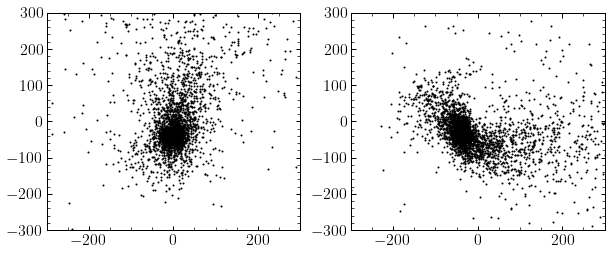

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(LMC_pos[rp, 0], LMC_pos[rp, 1], c='k', s=1)
ax[0].set_xlim(-300, 300)
ax[0].set_ylim(-300, 300)

ax[1].scatter(LMC_pos[rp, 1], LMC_pos[rp, 2], c='k', s=1)
ax[1].set_xlim(-300, 300)
ax[1].set_ylim(-300, 300)

In [11]:
rlmc = np.sqrt(np.sum(LMC_pos**2, axis=1))

In [12]:
index_rcut = np.where((rlmc<400) & (np.abs(LMC_pos[:,0])<100))

In [13]:
rmw = np.sqrt(np.sum(MW_pos**2, axis=1))
index_rcut_mw = np.where((rmw<400) & (np.abs(MW_pos[:,0])<100))

In [14]:
print(len(index_rcut[0]), len(index_rcut_mw[0]))

12844362 69972861


In [15]:
h, binsx, binsy = np.histogram2d(LMC_pos[:,1][index_rcut], LMC_pos[:, 2][index_rcut], 100)

In [16]:
h_mw, binsx_mw, binsy_mw = np.histogram2d(MW_pos[:,1][index_rcut_mw], MW_pos[:, 2][index_rcut_mw], 100)

In [17]:
MWLMC_pos = np.vstack((MW_pos[index_rcut_mw], LMC_pos[index_rcut]))

In [18]:
h_mwlmc, binsx_mwlmc, binsy_mwlmc = np.histogram2d(MWLMC_pos[:,1], MWLMC_pos[:, 2], 100)

<ipython-input-19-7fb31953af2f>:4: RuntimeWarning: divide by zero encountered in log10
  ax[0][0].contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], np.log10(np.abs(h_mwlmc.T)), 30, cmap='YlGnBu_r', vmin=2, vmax=7)
<ipython-input-19-7fb31953af2f>:5: RuntimeWarning: divide by zero encountered in log10
  ax[0][1].contourf(binsx_mw[:100], binsy_mw[:100], np.log10(np.abs(h_mw.T)), 30, cmap='YlGnBu_r', vmin=2, vmax=7)
<ipython-input-19-7fb31953af2f>:9: RuntimeWarning: divide by zero encountered in log10
  ax[1][0].contourf(binsx[:100], binsy[:100], np.log10(np.abs(h.T)), 50, cmap='coolwarm')
<ipython-input-19-7fb31953af2f>:15: RuntimeWarning: invalid value encountered in true_divide
  im3 = ax[1][1].contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], (h_mwlmc/h_mw).T-1, 50, cmap='coolwarm')


(-200.0, 200.0)

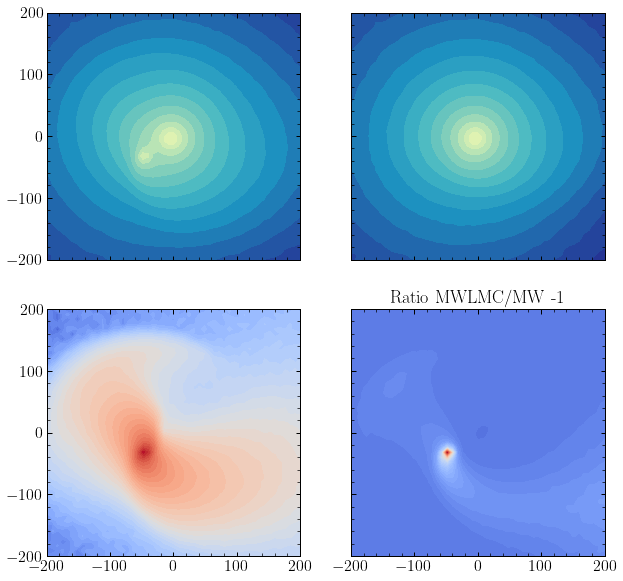

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

#ax[0][0].imshow(np.log10(np.abs(h_mw.T)), extent=[-300, 300, -300, 300], origin='lower', cmap='coolwarm')
ax[0][0].contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], np.log10(np.abs(h_mwlmc.T)), 30, cmap='YlGnBu_r', vmin=2, vmax=7)
ax[0][1].contourf(binsx_mw[:100], binsy_mw[:100], np.log10(np.abs(h_mw.T)), 30, cmap='YlGnBu_r', vmin=2, vmax=7)


#ax[1][0].imshow(np.log10(np.abs(h.T)), extent=[-300, 300, -300, 300], origin='lower', cmap='coolwarm')
ax[1][0].contourf(binsx[:100], binsy[:100], np.log10(np.abs(h.T)), 50, cmap='coolwarm')


#ax[2][0].imshow(np.log10(np.abs(h_mwlmc.T)), extent=[-300, 300, -300, 300], origin='lower', cmap='coolwarm')

#ax[3][0].imshow((h_mwlmc/h_mw).T-1, extent=[-300, 300, -300, 300], origin='lower', cmap='coolwarm')
im3 = ax[1][1].contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], (h_mwlmc/h_mw).T-1, 50, cmap='coolwarm')
#colorbar(im3)

ax[1][1].set_title('Ratio MWLMC/MW -1')


ax[1][1].set_xlim(-200, 200)
ax[1][1].set_ylim(-200, 200)
ax[1][0].set_xlim(-200, 200)
ax[1][0].set_ylim(-200, 200)


#savefig('sims_density_mw_lmc_yz.png', bbox_inches='tight')

<ipython-input-227-de0db2f071f2>:1: RuntimeWarning: divide by zero encountered in log10
  contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], np.log10(np.abs((h_mwlmc-h_mw))).T, 50, cmap='coolwarm')


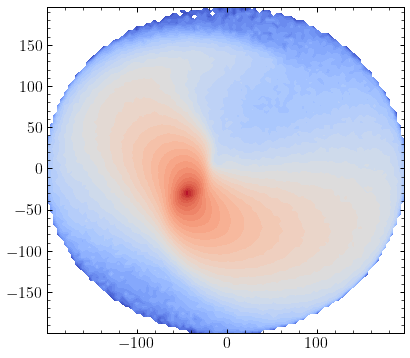

In [227]:
contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], np.log10(np.abs((h_mwlmc-h_mw))).T, 50, cmap='coolwarm')


In [ ]:
im = contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], (h_mwlmc/h_).T-1, 50, levels=np.linspace(-1.5, 1.5, 20), 
         cmap='coolwarm', vmin=-1.5, vmax=1.5)

In [109]:
orbit = np.loadtxt('../../MW_anisotropy/data/orbits/LMC5_100Mb0_orbit.txt')
lmc_wrt_mw = orbit[:140,6:9] - orbit[:140,0:3]

<ipython-input-120-81fa4c24dd5e>:5: RuntimeWarning: invalid value encountered in true_divide
  contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], (h_mwlmc/h_mw).T-1, 50, levels=np.linspace(-8, 8, 20),
<ipython-input-120-81fa4c24dd5e>:8: RuntimeWarning: invalid value encountered in true_divide
  im = contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], (h_mwlmc/h_mw).T-1, 50, levels=np.linspace(-1.5, 1.5, 20),
<ipython-input-120-81fa4c24dd5e>:10: MatplotlibDeprecationWarning: The 'boundaries' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar= fig.colorbar(im, boundaries=[-1.5, 1.5], extend='both')
<ipython-input-120-81fa4c24dd5e>:10: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar= fig.colorbar(im, boundaries=[-1.5, 1.5], extend='both')
<ip

Text(-75.26252099999999, 21.824753, '')

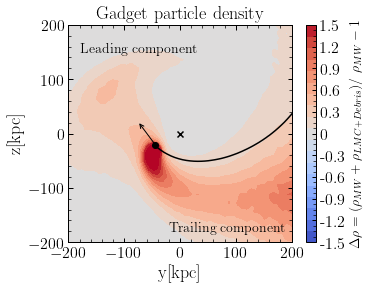

In [120]:
fig, ax = subplots(1, 1, figsize=(5,4))

title('Gadget particle density')

contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], (h_mwlmc/h_mw).T-1, 50, levels=np.linspace(-8, 8, 20), 
         cmap='coolwarm', vmin=-5, vmax=1)

im = contourf(binsx_mwlmc[:100], binsy_mwlmc[:100], (h_mwlmc/h_mw).T-1, 50, levels=np.linspace(-1.5, 1.5, 20), 
         cmap='coolwarm', vmin=-1.5, vmax=1.5)
cbar= fig.colorbar(im, boundaries=[-1.5, 1.5], extend='both')


#norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

cbar.set_ticks([-1.5, -1.2, -0.9,  -0.6, -0.3, 0, 0.3, 0.6, 0.9, 1.2, 1.5])
cbar.set_ticklabels([-1.5, -1.2, -0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9, 1.2, 1.5])
cbar.set_label(r'$\Delta \rho = (\rho_{MW}+\rho_{LMC+Debris}) /\ \rho_{MW} - 1$', fontsize=14 )
text(-180, 150, 'Leading component', fontsize=14 )
text(-20, -180, 'Trailing component', fontsize=14 )

plot(lmc_wrt_mw[:110,1], lmc_wrt_mw[:110,2], c='k')
scatter(lmc_wrt_mw[110,1], lmc_wrt_mw[110,2], c='k')

xlim(-200, 200)
ylim(-200, 200)

ylabel('z[kpc]')
xlabel('y[kpc]')

scatter(0, 0, c='k', marker='x', label='MW cusp')


annotate('', xy=(lmc_wrt_mw[109,1], lmc_wrt_mw[109,2]),  xycoords='data',
        xytext=(lmc_wrt_mw[119,1], lmc_wrt_mw[119,2]), textcoords='data',
        arrowprops=dict(facecolor='k', arrowstyle='<-', color='k'))

## MW debris

In [102]:
np.shape(MW_halo)

(5000000, 3)

In [120]:
r_halo= np.sqrt(np.sum(MW_halo**2, axis=1))
r_debris= np.sqrt(np.sum(debris**2, axis=1))
rcut_halo = np.where(r_halo<300)
rcut_debris = np.where(r_debris<300)

In [121]:
pos_halo_debris = np.vstack((MW_halo[rcut_halo], debris[rcut_debris]))



In [139]:
h_halo, binsx_halo, binsy_halo = np.histogram2d(MW_halo[:,1], MW_halo[:, 2], 60)
h_debris, binsx_debris, binsy_debris = np.histogram2d(debris[:,1], debris[:, 2], 60)

h_halo_debris, binsx_halo_debris, binsy_halo_debris = np.histogram2d(pos_halo_debris[:,1], pos_halo_debris[:, 2], 60)

In [188]:
print(binsy_halo[0], binsy_halo[1])
print(np.abs(binsy_halo[0]-binsy_halo[1]))
print(np.abs(binsx_debris[0]-binsx_debris[1]))

dbins = np.abs(binsy_halo[0]-binsy_halo[1])
dbins_db = np.abs(binsy_debris[0]-binsy_debris[1])


-399.656982421875 -386.3421147664388
13.314867655436217
6.7289581298828125


<ipython-input-175-c82578015b73>:3: RuntimeWarning: divide by zero encountered in log10
  ax[0].contourf(binsx_halo[:60]+dbins/2, binsy_halo[:60]+dbins/2, np.log10(np.abs(h_halo.T)), 50, cmap='YlGnBu_r',
<ipython-input-175-c82578015b73>:7: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(h_halo_debris.T)), 50, cmap='YlGnBu_r', vmin=2, vmax=5)


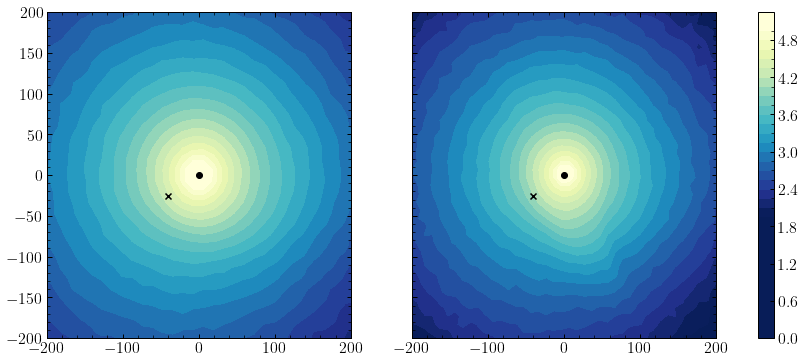

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

ax[0].contourf(binsx_halo[:60]+dbins/2, binsy_halo[:60]+dbins/2, np.log10(np.abs(h_halo.T)), 50, cmap='YlGnBu_r',
               vmin=2, vmax=5)

im2 = ax[1].contourf(binsx_halo_debris[:60]+dbins/2, binsy_halo_debris[:60]+dbins/2, 
                    np.log10(np.abs(h_halo_debris.T)), 50, cmap='YlGnBu_r', vmin=2, vmax=5)

#ax[2].contourf(binsx_debris[:60], binsy_debris[:60], np.log10(np.abs(h_debris.T)), 20, cmap='coolwarm', origin='lower')

fig.colorbar(im2, ax=ax[0:])
ax[0].scatter(0, 0, c='k')
ax[1].scatter(0, 0, c='k')

ax[0].scatter(-40, -26, c='k', marker='x')
ax[1].scatter(-40, -26, c='k', marker='x')

ax[0].set_xlim(-200, 200)
ax[0].set_ylim(-200, 200)
ax[1].set_xlim(-200, 200)
ax[1].set_ylim(-200, 200)
#ax[2].set_xlim(-200, 200)
#ax[2].set_ylim(-200, 200)
savefig('sims_density_halo_and_halo_debris_yz.png', bbox_inches='tight')

<ipython-input-209-59844c48966b>:1: RuntimeWarning: divide by zero encountered in log10
  im = contourf(binsx_debris[:60]+dbins_db/2, binsy_debris[:60]+dbins_db/2, np.log10(np.abs(h_debris.T)), 20, cmap='coolwarm', origin='lower')


(-200.0, 200.0)

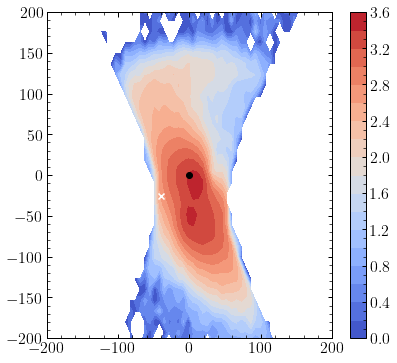

In [209]:
im = contourf(binsx_debris[:60]+dbins_db/2, binsy_debris[:60]+dbins_db/2, np.log10(np.abs(h_debris.T)), 20, cmap='coolwarm', origin='lower')
colorbar(im)

scatter(0, 0, c='k')
scatter(-40, -26, c='w', marker='x')
xlim(-200, 200)
ylim(-200, 200)

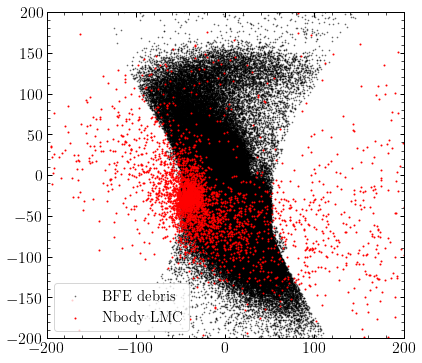

In [215]:
scatter(debris[:, 1], debris[:, 2], c='k', s=0.5, alpha=0.5, label='BFE debris')
scatter(LMC_pos[rp, 1], LMC_pos[rp, 2], c='r', s=1, label='Nbody LMC')

xlim(-200, 200)
ylim(-200, 200)
legend(fontsize=15)
savefig('LMC_debris_sim_and_bound_particles.png', bbox_inches='tight')

<ipython-input-186-f32745a445bd>:1: RuntimeWarning: divide by zero encountered in true_divide
  im2 = contourf(binsx_halo_debris[:60]+dbins/2, binsy_halo_debris[:60]+dbins/2, ((h_halo_debris/h_halo).T)-1,
<ipython-input-186-f32745a445bd>:1: RuntimeWarning: invalid value encountered in true_divide
  im2 = contourf(binsx_halo_debris[:60]+dbins/2, binsy_halo_debris[:60]+dbins/2, ((h_halo_debris/h_halo).T)-1,


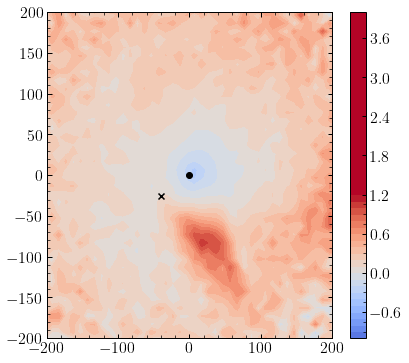

In [186]:
im2 = contourf(binsx_halo_debris[:60]+dbins/2, binsy_halo_debris[:60]+dbins/2, ((h_halo_debris/h_halo).T)-1, 
             50, cmap='coolwarm', vmin=-1.2, vmax=1.2, origin='lower')

xlim(-200, 200)
ylim(-200, 200)
colorbar(im2)
scatter(0, 0, c='k')
scatter(-40, -26, c='k', marker='x')

savefig('debris_halo_stacking_density_yz.png', bbox_inches='tight')

## Debris interacton with substrcture

In [25]:
KLMC = kinematics.Kinematics(LMC_pos, LMC_pos)

In [26]:
Lon_lmc, Lat_lmc = KLMC.pos_cartesian_to_galactic()

In [7]:
mwsts=galstreams.MWStreams(verbose=False)


/home/ngc/.local/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [30]:
d_lmc = np.sqrt(np.sum(LMC_pos**2, axis=1))

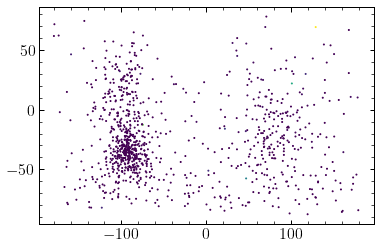

In [32]:
l50 = np.where(d_lmc<50)
l50_100 = np.where((d_lmc>50) & (d_lmc<100))
l100_200 = np.where((d_lmc>100) & (d_lmc<200))
l200_300 = np.where((d_lmc>200) & (d_lmc<300))



In [37]:
print(len(l50[0]), len(l50_100[0]), len(l100_200[0]), len(l200_300[0]))

3032992 6594836 2788611 706401


In [38]:
rp_50 = np.random.randint(0, len(l50[0]), 5000)
rp_50_100 = np.random.randint(0, len(l50_100[0]), 5000)
rp_100_200 = np.random.randint(0, len(l100_200[0]), 5000)
rp_200_300 = np.random.randint(0, len(l200_300[0]), 5000)

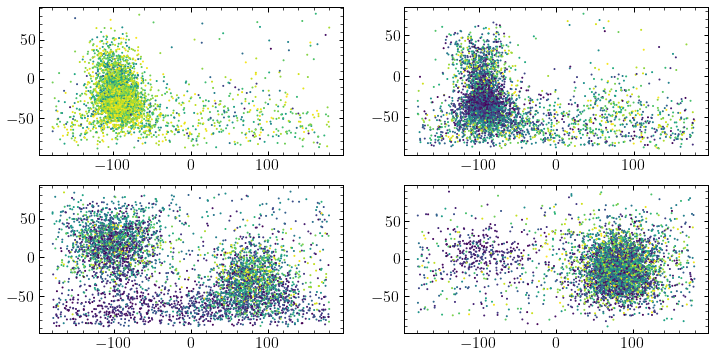

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax[0][0].scatter(Lon_lmc[l50][rp_50]*180/np.pi, Lat_lmc[l50][rp_50]*180/np.pi, s=1, c=d_lmc[l50][rp_50])
ax[0][1].scatter(Lon_lmc[l50_100][rp_50_100]*180/np.pi, Lat_lmc[l50_100][rp_50_100]*180/np.pi, s=1, c=d_lmc[l50_100][rp_50_100])
ax[1][0].scatter(Lon_lmc[l100_200][rp_100_200]*180/np.pi, Lat_lmc[l100_200][rp_100_200]*180/np.pi, s=1, c=d_lmc[l100_200][rp_100_200])
ax[1][1].scatter(Lon_lmc[l200_300][rp_200_300]*180/np.pi, Lat_lmc[l200_300][rp_200_300]*180/np.pi, s=1, c=d_lmc[l200_300][rp_200_300])

In [45]:
mwsts.plot_stream_compilation?

Skipping stream WG1, no valid Rhel => no valid galactocentric attributes
Skipping stream WG2, no valid Rhel => no valid galactocentric attributes
Skipping stream WG3, no valid Rhel => no valid galactocentric attributes
Skipping stream WG4, no valid Rhel => no valid galactocentric attributes


<ipython-input-47-5ed7e43db6ef>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma_r"))
  cmapp.set_under('grey')   #If distance info is missing (-1), plot in grey


(-90.0, 90.0)

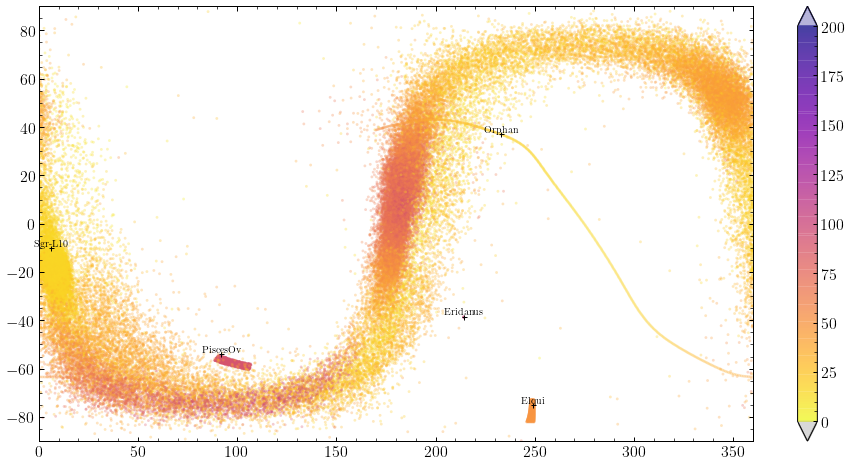

In [47]:
fig=plt.figure(1,figsize=(16,8))
ax=fig.add_subplot(111)
cmapp=plt.cm.plasma_r
cmapp.set_under('grey')   #If distance info is missing (-1), plot in grey
mwsts.plot_stream_compilation(ax,plot_colorbar=True,scat_kwargs=dict(vmin=00.,vmax=50.,cmap=cmapp, alpha=0.3),
                                  use_shortnames=False, verbose=False, cootype="GC", Rrange=[50, 200])


ax.set_xlim(0.,360.)
ax.set_ylim(-90.,90.)
#ax.set_xlabel('$l$ (deg)')
#ax.set_ylabel('$b$ (deg)')